# Importing Libraries

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix

In [23]:
# Filtering unnecessary warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [24]:
# Reading the dataset from a CSV file into a DataFrame
df = pd.read_csv('DataSet.csv')

In [27]:
df.head()

,having_ip_address,length_of_url,shortening_services,having_at_symbol,double-slash_redirection,prefix and suffix,sub_domains,ssl_state,domain_registered,favicons,...,on_mouse_over,right_click,popup_windows,domain_age,dns_record,web_traffic,links_pointing,statistical_report,image_text_keyword,result
0,-1,-1,-1,-1,-1,-1,1,1,1,1,...,1,1,1,1,1,1,1,-1,-1,1
1,-1,0,-1,-1,-1,1,0,-1,1,1,...,-1,-1,-1,-1,1,1,-1,-1,1,1
2,-1,-1,-1,-1,-1,-1,-1,-1,1,1,...,-1,-1,-1,-1,1,1,-1,-1,1,1
3,-1,-1,-1,-1,-1,-1,-1,-1,1,1,...,-1,-1,-1,-1,1,0,-1,-1,1,1
4,-1,1,-1,-1,-1,1,1,-1,1,1,...,-1,-1,-1,1,1,-1,-1,-1,-1,1


In [28]:
df.tail()

,having_ip_address,length_of_url,shortening_services,having_at_symbol,double-slash_redirection,prefix and suffix,sub_domains,ssl_state,domain_registered,favicons,...,on_mouse_over,right_click,popup_windows,domain_age,dns_record,web_traffic,links_pointing,statistical_report,image_text_keyword,result
14088,-1,-1,-1,-1,-1,-1,0,-1,1,-1,...,-1,-1,-1,1,1,-1,1,-1,1,-1
14089,-1,-1,-1,-1,-1,-1,0,-1,1,-1,...,-1,-1,-1,-1,1,-1,1,-1,-1,-1
14090,-1,-1,-1,-1,-1,-1,0,-1,1,-1,...,-1,-1,-1,-1,1,-1,1,-1,1,-1
14091,-1,-1,-1,-1,-1,-1,0,-1,1,-1,...,-1,-1,-1,-1,1,-1,1,-1,-1,-1
14092,-1,-1,-1,-1,-1,-1,0,-1,1,-1,...,-1,-1,-1,-1,1,-1,1,-1,1,-1


# Exploring Dataset

In [29]:
# Displaying the dimensions (number of rows and columns) of the DataFrame
df.shape

(14093, 29)

In [30]:
# Displaying information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14093 entries, 0 to 14092
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   having_ip_address         14093 non-null  int64
 1   length_of_url             14093 non-null  int64
 2   shortening_services       14093 non-null  int64
 3   having_at_symbol          14093 non-null  int64
 4   double-slash_redirection  14093 non-null  int64
 5   prefix and suffix         14093 non-null  int64
 6   sub_domains               14093 non-null  int64
 7   ssl_state                 14093 non-null  int64
 8   domain_registered         14093 non-null  int64
 9   favicons                  14093 non-null  int64
 10  ports                     14093 non-null  int64
 11  https                     14093 non-null  int64
 12  external_objects          14093 non-null  int64
 13  anchor_tags               14093 non-null  int64
 14  links_in_tags             14093 non-nu

In [31]:
# Displaying statistics of the DataFrame's numerical columns
df.describe()

,having_ip_address,length_of_url,shortening_services,having_at_symbol,double-slash_redirection,prefix and suffix,sub_domains,ssl_state,domain_registered,favicons,...,on_mouse_over,right_click,popup_windows,domain_age,dns_record,web_traffic,links_pointing,statistical_report,image_text_keyword,result
count,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,...,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000,14093.000000
mean,-0.994891,-0.199674,-0.823033,-0.983538,-0.994040,-0.612148,0.344568,0.160009,0.783155,0.743135,...,0.152345,0.151210,0.178599,0.439296,0.793515,0.123891,0.595757,-0.531257,0.718016,0.000355
std,0.100958,0.874794,0.568014,0.180708,0.109024,0.790771,0.688640,0.987151,0.621849,0.669165,...,0.988362,0.988537,0.983957,0.898374,0.608573,0.954012,0.774085,0.847241,0.696051,1.000035
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000
75%,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# Displaying the number of unique values of each column
df.nunique()

,0
having_ip_address,2
length_of_url,3
shortening_services,2
having_at_symbol,2
double-slash_redirection,2
prefix and suffix,2
sub_domains,3
ssl_state,2
domain_registered,2
favicons,2


# Cleaning Dataset

In [51]:
# Checking for missing values and displaying the sum of null values
df.isnull().sum()

,0
having_ip_address,0
length_of_url,0
shortening_services,0
having_at_symbol,0
double-slash_redirection,0
prefix and suffix,0
sub_domains,0
ssl_state,0
domain_registered,0
favicons,0


# Visualizing Data

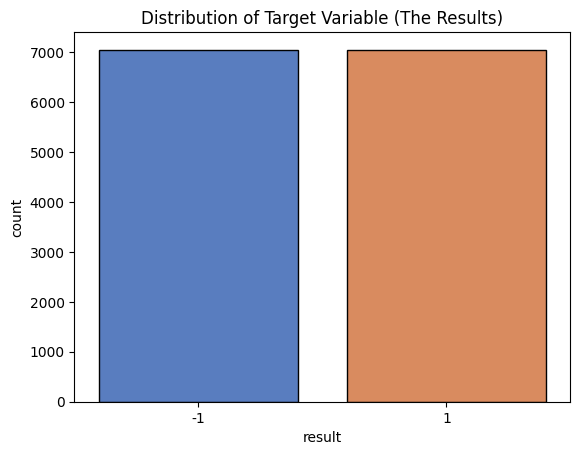

The visualization highlights that the dataset is balanced, with an equal number of harmful and harmless URLs.


In [34]:
# Visualizing the distribution of the target variable 'result'

color = sns.color_palette("muted", 2)  # Changed to 'muted' color palette
sns.countplot(x='result', data=df, palette=color, edgecolor='black')  # Updated edge color to black
plt.title('Distribution of Target Variable (The Results)')
plt.show()

print('The visualization highlights that the dataset is balanced, with an equal number of harmful and harmless URLs.')


array([[<Axes: title={'center': 'having_ip_address'}>,
        <Axes: title={'center': 'length_of_url'}>,
        <Axes: title={'center': 'shortening_services'}>,
        <Axes: title={'center': 'having_at_symbol'}>,
        <Axes: title={'center': 'double-slash_redirection'}>],
       [<Axes: title={'center': 'prefix and suffix'}>,
        <Axes: title={'center': 'sub_domains'}>,
        <Axes: title={'center': 'ssl_state'}>,
        <Axes: title={'center': 'domain_registered'}>,
        <Axes: title={'center': 'favicons'}>],
       [<Axes: title={'center': 'ports'}>,
        <Axes: title={'center': 'https'}>,
        <Axes: title={'center': 'external_objects'}>,
        <Axes: title={'center': 'anchor_tags'}>,
        <Axes: title={'center': 'links_in_tags'}>],
       [<Axes: title={'center': 'sfh-domain'}>,
        <Axes: title={'center': 'auto_email'}>,
        <Axes: title={'center': 'abnoramal_url'}>,
        <Axes: title={'center': 'iframe_redirection'}>,
        <Axes: title={'

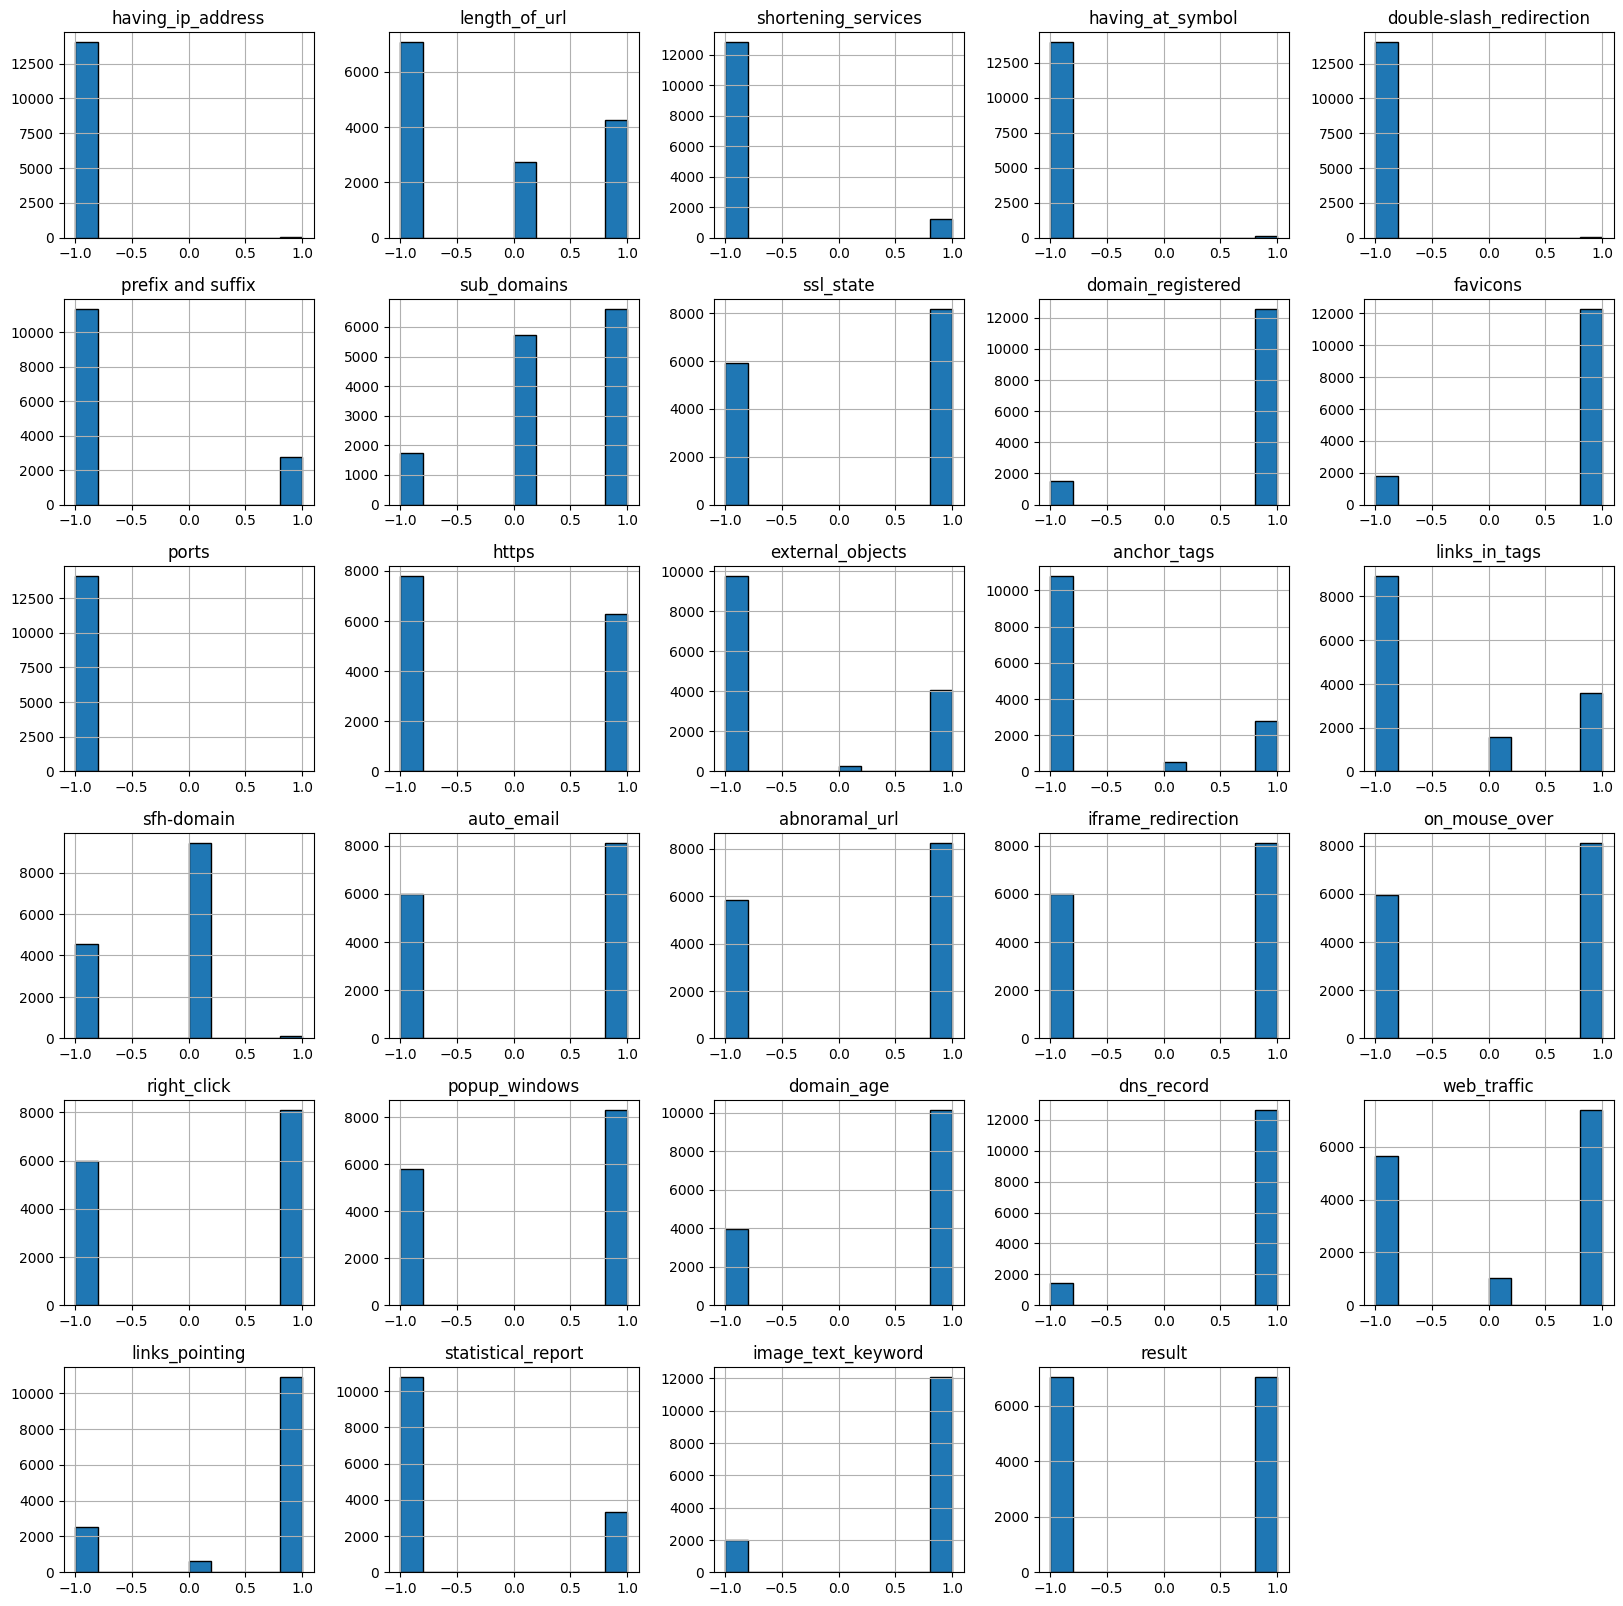

In [35]:
# Plotting histograms for each column
df.hist(edgecolor='black', figsize=(20,20))

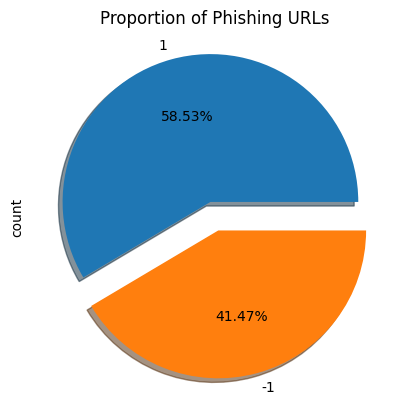

The pie chart indicates that the dataset contains a larger proportion of fraudulent URLs.


In [37]:
# Creating a pie chart to visualize the 'abnormal_url' column distribution
df['abnoramal_url'].value_counts().plot(
    kind='pie',
    explode=[0.1, 0.1],  # Adding a slight separation between slices
    autopct='%1.2f%%',  # Displaying percentages with two decimal places
    shadow=True  # Enabling a shadow effect for better visual appeal
)
plt.title("Proportion of Phishing URLs")
plt.show()

print("The pie chart indicates that the dataset contains a larger proportion of fraudulent URLs.")

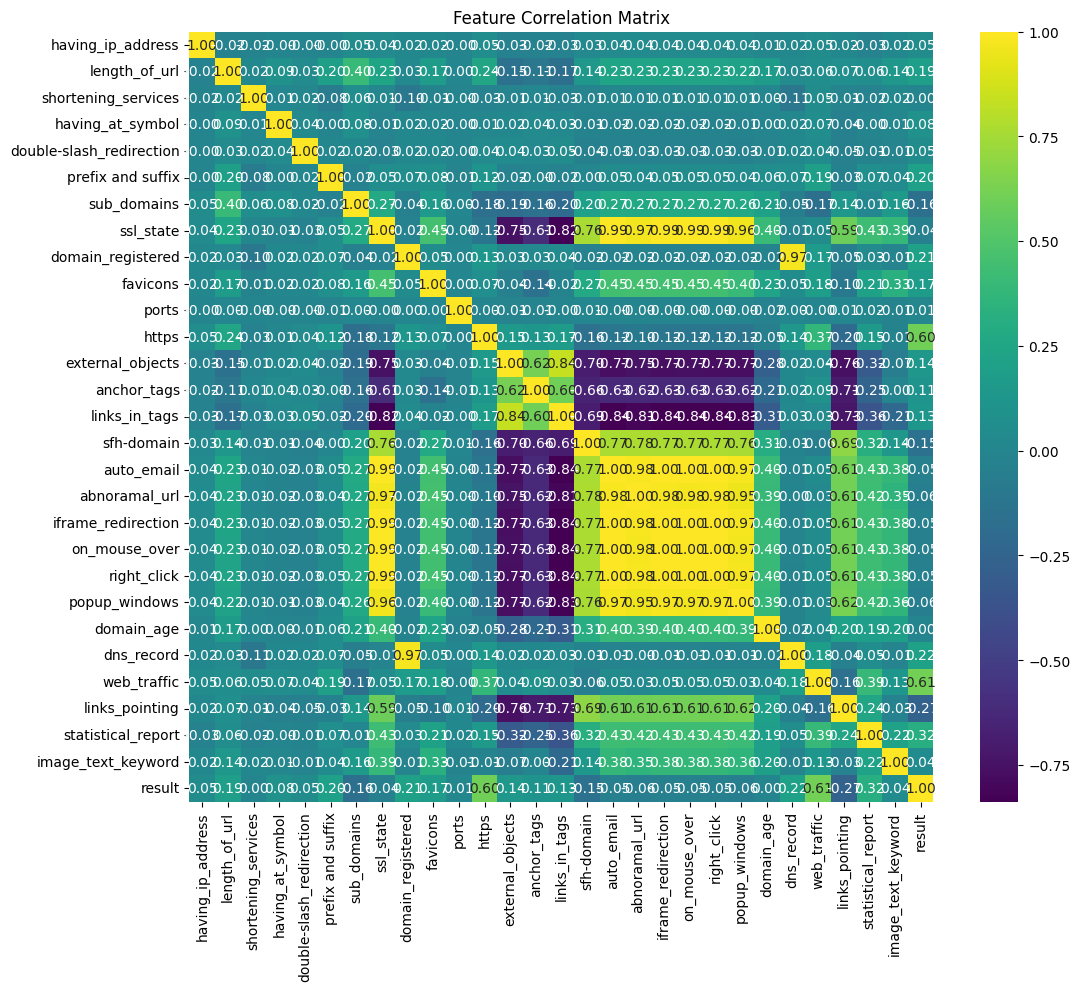

The heatmap illustrates the degree of correlation between various features in the dataset.


In [38]:
# Displaying the correlation matrix to analyze feature relationships
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")  # Using 'viridis' for a vibrant color palette
plt.title('Feature Correlation Matrix')
plt.show()

print("The heatmap illustrates the degree of correlation between various features in the dataset.")


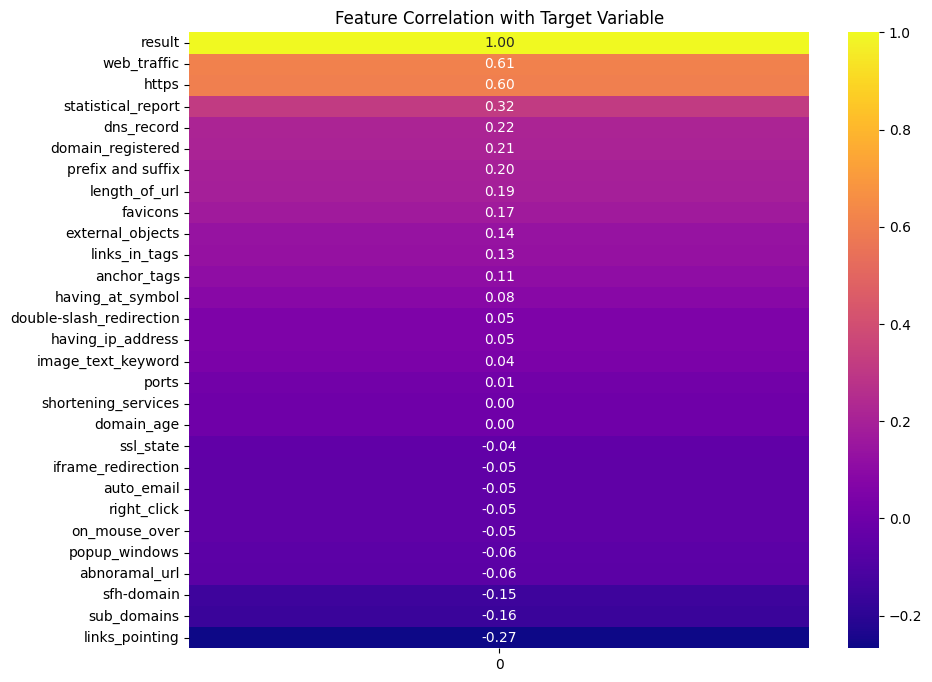

The analysis reveals that features such as "web_traffic" and "https" have a strong relationship with determining whether a URL is malicious.


In [39]:
# Determining the correlation of each feature with the target variable 'result'
corr_with_target = df.corrwith(df['result'])

# Visualizing the correlation using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_with_target.sort_values(ascending=False).to_frame(),
    cmap='plasma',  # Updated to use the 'plasma' color palette for a fresh look
    annot=True,
    fmt=".2f"
)
plt.title('Feature Correlation with Target Variable')
plt.show()

print(
    'The analysis reveals that features such as "web_traffic" and "https" '
    'have a strong relationship with determining whether a URL is malicious.'
)

The histogram demonstrates that the majority of URLs are lengthy, indicating a higher prevalence of fraudulent URLs in the dataset.


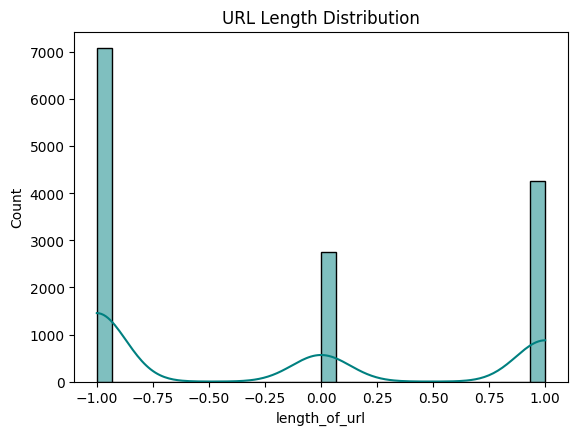

In [40]:
# Analyzing the distribution of URL lengths using a histogram
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['length_of_url'], bins=30, kde=True, color='teal')  # Changed color to 'teal'
plt.title('URL Length Distribution')

print(
    'The histogram demonstrates that the majority of URLs are lengthy, '
    'indicating a higher prevalence of fraudulent URLs in the dataset.'
)

# Splitting the Data

In [41]:
# Splitting the dataset into features (X) and the target variable (Y)
X = df.drop(["result"], axis=1)  # Features excluding the target column
Y = df["result"]  # Target variable

In [42]:
# Dividing the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)  # 20% for testing

In [43]:
# Displaying the dimensions of the training and testing sets
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((11274, 28), (2819, 28), (11274,), (2819,))

# K-Nearest Neighbours

In [44]:
# Setting up the K-Nearest Neighbors (KNN) classifier
knn_model = KNeighborsClassifier()

# Specifying the range of hyperparameter values for tuning
knn_params = {'n_neighbors': [3, 5, 7, 9, 11, 13]}

# Applying GridSearchCV to identify the optimal hyperparameters
knn_grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=knn_params,
    refit=True,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'
)

In [45]:
# Training the KNN model using grid search
knn_grid_search.fit(X_train, Y_train)

# Extracting the optimal hyperparameters
knn_best_params = knn_grid_search.best_params_
print("Optimal KNN Hyperparameters: ", knn_best_params)

# Retrieving the highest cross-validation accuracy achieved by the KNN model
knn_best_score = knn_grid_search.best_score_
print("Best Cross-Validated Score for KNN: ", knn_best_score)

Optimal KNN Hyperparameters:  {'n_neighbors': 11}
Best Cross-Validated Score for KNN:  0.907663144309107


In [47]:
# Creating a new KNN model with the best hyperparameter
knn_best_model = KNeighborsClassifier(n_neighbors=list(knn_best_params.values())[0])

# Fitting the best KNN model with the training data
knn_best_model.fit(X_train, Y_train)

# Predicting using the test dataset with the best model
knn_y_pred = knn_best_model.predict(X_test)

In [52]:
# Displaying the accuracy of the optimized KNN model
knn_accuracy = accuracy_score(Y_test, knn_y_pred)
print(f"KNN Accuracy: {knn_accuracy:.3f}")

# Displaying the precision of the optimized KNN model
knn_precision = precision_score(Y_test, knn_y_pred)
print(f"KNN Precision: {knn_precision:.3f}")

# Displaying the recall of the optimized KNN model
knn_recall = recall_score(Y_test, knn_y_pred)
print(f"KNN Recall: {knn_recall:.3f}")

# Displaying the F1 score of the optimized KNN model
knn_f1 = f1_score(Y_test, knn_y_pred)
print(f"KNN F1 Score: {knn_f1:.3f}")

# Displaying the error rate of the optimized KNN model
knn_error = 1 - knn_accuracy
print(f"KNN Error Rate: {knn_error:.3f}")


KNN Accuracy: 0.909
KNN Precision: 0.902
KNN Recall: 0.918
KNN F1 Score: 0.910
KNN Error Rate: 0.091


In [53]:
# Generating and displaying the confusion matrix for the KNN model
knn_con_matrix = confusion_matrix(Y_test, knn_y_pred)
print(f"Confusion Matrix for KNN Model:\n{knn_con_matrix}")

Confusion Matrix for KNN Model:
[[1260  141]
 [ 116 1302]]


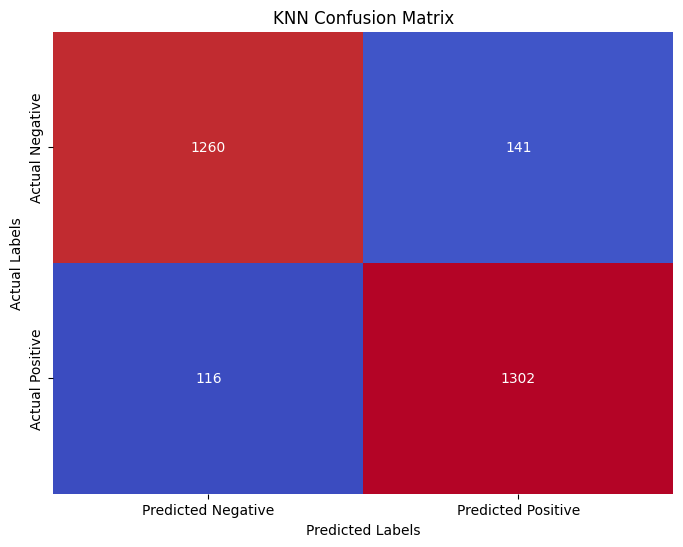

In [54]:
# Visualizing the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(knn_con_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

# Random Forest

In [55]:
# Setting up the Random Forest (RF) classifier
rf_model = RandomForestClassifier()

# Specifying the hyperparameter grid for tuning the RF model
rf_param_grid = {
    'n_estimators': [50, 100, 150],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]           # Minimum samples required to be at a leaf node
}

# Setting up GridSearchCV to identify the optimal hyperparameters for the RF model
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy'
)


In [56]:
# Training the Random Forest model
rf_grid_search.fit(X_train, Y_train)

# Retrieving the optimal hyperparameters
rf_best_params = rf_grid_search.best_params_
print("Optimal Hyperparameters for Random Forest: ", rf_best_params)

# Retrieving the highest cross-validation accuracy score achieved
rf_best_score = rf_grid_search.best_score_
print("Best Cross-Validation Accuracy for Random Forest: ", rf_best_score)


Optimal Hyperparameters for Random Forest:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy for Random Forest:  0.9228303857935731


In [57]:
# Random Forest model using the optimal hyperparameters obtained from GridSearchCV
best_rf_model = RandomForestClassifier(
    n_estimators=rf_best_params['n_estimators'],
    max_depth=rf_best_params['max_depth'],
    min_samples_split=rf_best_params['min_samples_split'],
    min_samples_leaf=rf_best_params['min_samples_leaf']
)


In [60]:
# Training the optimized Random Forest model on the training dataset
best_rf_model.fit(X_train, Y_train)

# Making predictions on the test dataset using the trained model
rf_y_pred = best_rf_model.predict(X_test)

In [59]:
# Displaying the accuracy of the Random Forest model
rf_accuracy = accuracy_score(Y_test, rf_y_pred)
print(f"Accuracy of Random Forest Model: {rf_accuracy: .3f}")

# Displaying the precision of the Random Forest model
rf_precision = precision_score(Y_test, rf_y_pred)
print(f"Precision of Random Forest Model: {rf_precision: .3f}")

# Displaying the recall of the Random Forest model
rf_recall = recall_score(Y_test, rf_y_pred)
print(f"Recall of Random Forest Model: {rf_recall: .3f}")

# Displaying the F1 score of the Random Forest model
rf_f1 = f1_score(Y_test, rf_y_pred)
print(f"F1 Score of Random Forest Model: {rf_f1: .3f}")

# Displaying the error rate of the Random Forest model
rf_error = 1 - rf_accuracy
print(f"Error Rate of Random Forest Model: {rf_error: .3f}")


Accuracy of Random Forest Model:  0.923
Precision of Random Forest Model:  0.913
Recall of Random Forest Model:  0.936
F1 Score of Random Forest Model:  0.924
Error Rate of Random Forest Model:  0.077


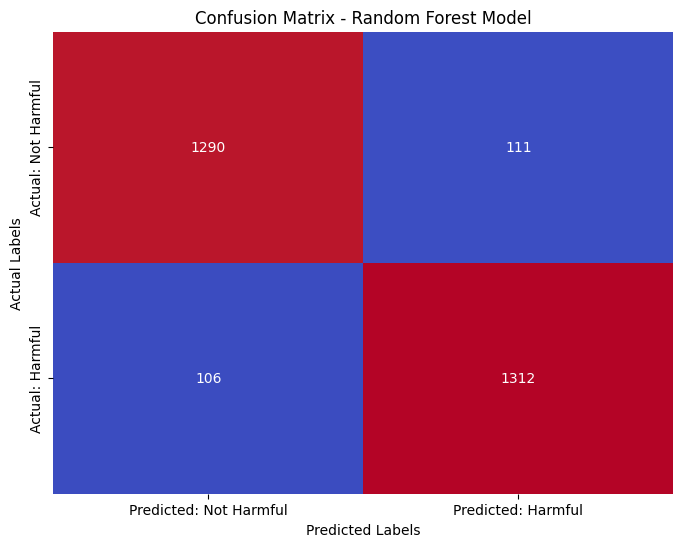

In [62]:
# Generating a confusion matrix for the Random Forest model
rf_con_matrix = confusion_matrix(y_test, rf_y_pred)

# Visualizing the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rf_con_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            xticklabels=['Predicted: Not Harmful', 'Predicted: Harmful'],
            yticklabels=['Actual: Not Harmful', 'Actual: Harmful'])
plt.title('Confusion Matrix - Random Forest Model')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


# Support Vector Machine (SVM)

In [63]:
# Initializing the Support Vector Machine (SVM) model
svm_model = SVC()

# Defining a range of hyperparameters for SVM tuning
svm_param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Different types of kernel functions
    'gamma': ['scale', 'auto']
}

# Setting up GridSearchCV to perform hyperparameter optimization for the SVM model
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=5, scoring='accuracy')


In [64]:
# Fitting the SVM grid search to the training data
svm_grid_search.fit(X_train, Y_train)

# Getting the best hyperparameters after the grid search
svm_best_params = svm_grid_search.best_params_
print("SVM Best Hyperparameters: ", svm_best_params)

# Getting the best cross-validation score from the grid search
svm_best_score = svm_grid_search.best_score_
print("SVM Best Score: ", svm_best_score)


SVM Best Hyperparameters:  {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Best Score:  0.9207018220379831


In [65]:
# Creating an SVM model with the best hyperparameters
best_svm_model = SVC(
    C=svm_best_params['C'],
    kernel=svm_best_params['kernel'],
    gamma=svm_best_params['gamma']
)


In [66]:
# Training the optimized SVM model with the training dataset
best_svm_model.fit(X_train, Y_train)

# Generating predictions for the test dataset
svm_y_pred = best_svm_model.predict(X_test)


In [67]:
# Evaluating the accuracy of the SVM model
svm_accuracy = accuracy_score(Y_test, svm_y_pred)
print(f"SVM Model Accuracy: {svm_accuracy: .3f}")

# Calculating the precision of the SVM model
svm_precision = precision_score(Y_test, svm_y_pred)
print(f"SVM Precision Score: {svm_precision: .3f}")

# Calculating the recall of the SVM model
svm_recall = recall_score(Y_test, svm_y_pred)
print(f"SVM Recall Score: {svm_recall: .3f}")

# Calculating the F1 score for the SVM model
svm_f1 = f1_score(Y_test, svm_y_pred)
print(f"SVM F1 Score: {svm_f1: .3f}")

# Calculating the error rate of the SVM model
svm_error = 1 - svm_accuracy
print(f"SVM Model Error Rate: {svm_error: .3f}")


SVM Model Accuracy:  0.920
SVM Precision Score:  0.914
SVM Recall Score:  0.929
SVM F1 Score:  0.921
SVM Model Error Rate:  0.080


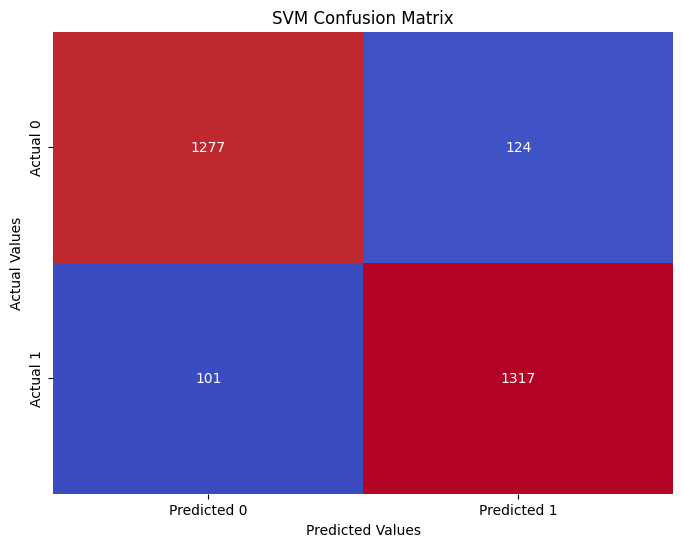

In [68]:
# Generating the confusion matrix for SVM model predictions
svm_con_matrix = confusion_matrix(Y_test, svm_y_pred)

# Plotting the confusion matrix as a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(svm_con_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


# Final Report

In [69]:
# Creating a dictionary to store performance metrics for each algorithm
metrics_dict = {
    'KNN': [knn_accuracy, knn_precision, knn_recall, knn_f1, knn_error],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_error],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1, svm_error]
}

# Converting the dictionary into a DataFrame for easier visualization
metrics_df = pd.DataFrame(metrics_dict, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Error'])

# Displaying the DataFrame
metrics_df


,KNN,Random Forest,SVM
Accuracy,0.908833,0.923022,0.920184
Precision,0.902287,0.913283,0.913949
Recall,0.918195,0.935825,0.928773
F1 Score,0.910171,0.924417,0.921301
Error,0.091167,0.076978,0.079816


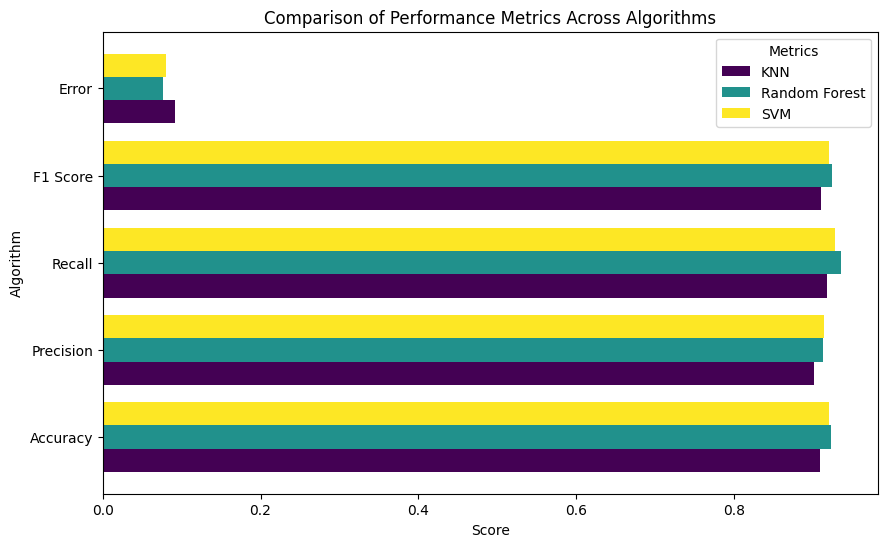

In [71]:
# Plotting a horizontal bar chart to visualize the performance metrics of each algorithm
metrics_df.plot(kind='barh', figsize=(10, 6), colormap='viridis', width=0.8)
plt.title('Comparison of Performance Metrics Across Algorithms')
plt.xlabel('Score')
plt.ylabel('Algorithm')
plt.legend(title='Metrics')
plt.show()
